# Машинное обучение, DS-поток
## Домашнее задание 10

**Правила:**

* Дедлайн **22 мая 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[ml] Фамилия Имя - задание 10"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук, его pdf-версию (без архивов) и ссылку на google диск с весами лучшей модели. Названия файлов должны быть такими: `10.N.ipynb` и `10.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Теоретические задачи необходимо оформить в техе/markdown или же прислать фотку в правильной ориентации рукописного решения, **где все четко видно**.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.

**Баллы за задание:**

* Часть 1 – 20 баллов
* Часть 2 – 5 баллов

## Часть 1: Сверточные сети

В этой домашней работе вам предстоит построить сверточную сеть для классификации картинок из датасета [**"Best Artworks Of All Time"**](https://www.kaggle.com/ikarus777/best-artworks-of-all-time). По изображению картины нужно предсказать автора (художника), написавшего ее.

![](https://sun9-51.userapi.com/c858136/v858136162/1c0b61/GwA18z9fPIg.jpg)

**Пожалуйста, прочитайте то, что написано ниже, там изложены требования к вашей работе и полезные советы!**

Цель задания – построить нейросеть, чтобы достичь максимально возможного accuracy. В конце задания вы должны будете предоставить отчет о проделанной работе.

**Оценивание вашей работы:**

В сумме за домашнюю работу можно получить $25$ баллов.

* +$3$ балла за работу за предоставление детального отчета (требования к нему изложены ниже).
* +$3$ балла за построение нейросети, которая достигает значения Accuracy не менее 20% на тестовом датасете.
* +$2$ балла за каждый следующий пройденный порог.
    * 25% Accuracy
    * 30% Accuracy
    * 32.5% Accuracy
    * 35% Accuracy
    * 37.5% Accuracy
    * 40% Accuracy
    
* +$2$ балла за выполнение "задания на ваше знание статистики". Вы можете найти его в конце всех советов и требований

* +$5$ баллов за выполнение второй части задания (Transfer Learning)

**Требование к работе:**

* В этой части задания **запрещено** использовать предобученные нейросети. Для этого есть вторая часть домашней работы и она оценивается отдельно!

* **Запрещено** использовать тестовые данные за исключением вычисления финальной оценки качества.

* Сохраните веса лучшей модели с помощью `torch.save` ([инструкция](https://pytorch.org/tutorials/beginner/saving_loading_models.html)) и пришлите ссылку на файл с весами на google диске. Так мы сможем проверить выполнение предыдущего пункта. **Работы без присланных весов не будут засчитаны.**

    Пример сохранения и загрузки весов:
    
    ```
    # Save:
    torch.save(model, PATH)

    # Load:
    model = torch.load(PATH)
    model.eval()

    ```

    Более подробную инструкцию можно найти по [ссылке](https://pytorch.org/tutorials/beginner/saving_loading_models.html).

**Требования к отчёту:**

* Опишите свои эксперименты: с чего вы начали, что попробовали улучшить и почему, заработало это или нет, какие вы сделали из этого выводы.

* Опишите вашу лучшую архитектуру, методы обучения и интересные моменты.


### Советы:

#### Архитектура нейросети:
* Это задание может быть решено последовательностью сверток, пулингов, батчнорма и активаций, но не стоит останавливаться на этом.
* Можно рассмотреть такие архитектуры как [Inception family](https://hacktilldawn.com/2016/09/25/inception-modules-explained-and-implemented/), [ResNet family](https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035?gi=9018057983ca), [Densely-connected convolutions](https://arxiv.org/abs/1608.06993). Однако вам нужно будет реализовать их самостоятельно.
* Попробуйте сначала построить простую нейросеть, чтобы понять как с ними работать, перед тем как использовать resnet-152.
* Также можно попробовать разные активации: `tanh`, `leaky relu` и другие.

#### Переобучение:
Если ваша нейросеть переобучается (лосс на тесте падает, а на валидации растет), вот некоторые методы, как с этим бороться:
* Попробуйте добавить Dropout. Не бойтесь удалять много данных, но всегда проверяйте, что это не испортило вам качество.
* Добавьте L2 регуляризацию весов (начните с небольшого значения). Регуляризация контролируется параметром `weight_decay` оптимизатора.
* Попробуйте уменьшать `learning rate` с течением времени. В этом поможет `torch.optim.lr_scheduler`.
* Уменьшите число нейронов в сети.
* [Прерывайте обучение](https://github.com/Bjarten/early-stopping-pytorch), если сеть начала переобучаться.

#### Процесс обучения:
* Воспользуйтесь GPU google colab или любой другой GPU, которая у вас есть. 
* Для сокращения вычислительной сложности можно поэксперементировать с параметром `stride`. 
* Эксперементируйте с оптимизаторами: `rmsprop`, `nesterov_momentum`, `adam`, `adagrad` и далее. В этом вам поможет  `torch.optim`.
* Помните, что некоторым нейросетям требуется $10$ эпох, чтобы сойтись, а некоторым – $500$. Большие нейросети дольше обучаются.
* Если вы достигли какого-то порога на валидации лучше подождать примерно 10 эпох перед тем как останавливать обучение.

#### Аугментация данных:
* Вы можете использовать любые библиотеки для аугментации данных, например: [torchvision.transforms](https://pytorch.org/docs/stable/torchvision/transforms.html), [albumentations](https://albumentations.readthedocs.io/en/latest/api/augmentations.html), [augmentor](https://augmentor.readthedocs.io/en/master/), [imgaug](https://imgaug.readthedocs.io/en/latest/).
* Попробуйте добавить шум.
* Повернуть картинку + приблизить, чтобы убрать черные края.
* Отразить её вертикально или горизонтально.
* Сократить размер картинки, это позволит сократить параметры сети.
* При аугментации всегда нужно помнить с какими данными мы работаем (разворачивание собаки на 180 градусов вам, наверняка, не поможет, потому что таких примеров, скорее всего, не будет в тестовой выборке).


И главное: 

* Тестируйте только **одну идею за раз**.
* Сохраняёте веса моделей (для каждого эксперимента, через N эпох, при достижении наилучшего качества на валидации), чтобы нечаянно не потерять результаты долгой работы.
* Рисуйте кривые обучения (loss и метрику качества) для обучения и валидации.

Поставим RAdam.

In [1]:
!git clone https://github.com/LiyuanLucasLiu/RAdam.git RAdam

Cloning into 'RAdam'...
remote: Enumerating objects: 320, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 320 (delta 1), reused 2 (delta 0), pack-reused 313
Receiving objects: 100% (320/320), 955.36 KiB | 3.72 MiB/s, done.
Resolving deltas: 100% (147/147), done.


In [2]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 4.3 MB/s 
     |████████████████████████████████| 596 kB 47.9 MB/s 
     |████████████████████████████████| 67 kB 5.2 MB/s 
     |████████████████████████████████| 895 kB 47.6 MB/s 
     |████████████████████████████████| 6.5 MB 45.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
import os
import time
import random
import gc
import shutil
from collections import defaultdict, OrderedDict

import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision
from tqdm.notebook import tqdm

from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchsummary import summary

from sklearn.metrics import accuracy_score, confusion_matrix

from IPython.display import clear_output

from google.colab import drive

from transformers import AdamW
from RAdam import radam

sns.set(font_scale=1.2)
%matplotlib inline

In [4]:
USE_GPU = True

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print('using device:', device)

using device: cuda


In [5]:
!nvidia-smi

Sun Mar 27 06:37:19 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    26W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Для инициализации всех генераторов случайных чисел.

In [7]:
random_seed = 42
random_state = random_seed

def set_seed_everywhere(seed, cuda):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    if cuda:
        torch.cuda.manual_seed_all(seed)

set_seed_everywhere(random_seed, USE_GPU)

Скачаем данные по ссылке:

In [8]:
!rm -rf data/

In [9]:
!wget -O data.tar.xz https://www.dropbox.com/s/w90m55pl7ylgiaf/data.tar.xz?dl=0
!tar -xf data.tar.xz data
!ls data/train | wc -l
!find data/train -type f | wc -l

--2022-03-27 06:37:31--  https://www.dropbox.com/s/w90m55pl7ylgiaf/data.tar.xz?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/w90m55pl7ylgiaf/data.tar.xz [following]
--2022-03-27 06:37:31--  https://www.dropbox.com/s/raw/w90m55pl7ylgiaf/data.tar.xz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccde3c4c86b55f2e628caefe152.dl.dropboxusercontent.com/cd/0/inline/BiPRr5owXJLtbc2isR78ESodZuk2E2AaIh6PYkGo41NsZdmnZCGSH7PvqVfSBKfYlA1u4w_9yTgixxV-CR6Spj_Q8ElUzRUZ9vralpLb3YTlO3GSH4uFippNQtQfQBIee8yUoK03DV4WIsspmu-NGCEuYZagP64tQMragMQn2ghRuA/file# [following]
--2022-03-27 06:37:32--  https://uccde3c4c86b55f2e628caefe152.dl.dropboxusercontent.com/cd/0/inline/BiPRr5owXJLtbc2isR78ESodZuk2E2AaIh6PYkGo41NsZdmnZCGSH7PvqVfSBKf

Уменьшим все изображения так, чтобы самая большая из осей не превышала 400px.

In [10]:
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono g

In [11]:
!find data/ -name '*.jpg' -execdir mogrify -resize '400x400>' {} \;

mogrify-im6.q16: Corrupt JPEG data: 10 extraneous bytes before marker 0xd9 `./Edgar_Degas_216.jpg' @ warning/jpeg.c/JPEGWarningHandler/352.


In [ ]:
drive.mount('/content/drive')
PATH_PREFIX = 'drive/My Drive/mipt-stats/ML/ML-10'
MODEL_PREFIX = 'drive/My Drive/mipt-stats/ML/ML-10/models'

В `train` датасете 51 художник (класс) и 6116 изображения картин (объектов).

Посмотрим на данные:

In [ ]:
path_to_img = 'data/train/William_Turner/William_Turner_9.jpg'
image = plt.imread(path_to_img)
plt.figure(figsize=(12, 5))
plt.imshow(image);

Разобьем `train` выборку на `train` и `val`:



In [ ]:
os.makedirs('data/val', exist_ok=True)

TRAIN_FRAC = 0.7

Заметим, что почему-то в выборке два раза присутствует Альбрехт Дюрер: Albrecht_DuтХа├кrer, Albrecht_Du╠Иrer. Удалим одну из директорий.

In [ ]:
!rm -rf data/train/Albrecht_DuтХа├кrer
!rm -rf data/test/Albrecht_DuтХа├кrer

В коде ниже находится проблема с воспроизводимостью, потому что `os.listdir()` не гарантирует никакого порядка над выводимыми файлами. Это может привести к тому, что при попытке дообучить модель будет использоваться другое разбиение на валидацию и трейн, что сильно осложнит понимание хода процесса дообучения (так как часть валидации раньше была в трейне, на ней частично произошло переобучение, и результаты будут завышенными).

Чтобы этого в какой-то степени избежать надо упорядочить вывод `os.listdir()`.

In [ ]:
# считываем названия директорий
ARTIST_LIST = {i:name for i, name in enumerate(sorted(os.listdir('data/train/')))}
IMAGES_DIR = 'data/train/'

max_train_images = 0
images_counts = {}

# создаем директорию с валидационной выборкой для каждого художника
for artist in ARTIST_LIST.values():
    os.makedirs(f'data/val/{artist}/', exist_ok=True)

    # считываем выборку картин художника
    artist_path = f'{IMAGES_DIR}/{artist}/'
    images_filename = sorted(os.listdir(artist_path), 
                             key=lambda x: int(x.split('_')[-1].split('.')[0]))
    images_counts[artist] = len(images_filename)
    
    # выделяем часть картин для валидации
    num_train = int(len(images_filename) * TRAIN_FRAC)
    max_train_images = max(max_train_images, num_train)
    val_images = images_filename[num_train:]

    print(f'{artist} | train images = {num_train} | val images = {len(val_images)}')
    
    # сохраняем валидационную выборку
    for image_filename in val_images:
        source = f'{IMAGES_DIR}/{artist}/{image_filename}'
        destination = f'data/val/{artist}/{image_filename}'
        shutil.copy(source, destination)
        os.remove(source)

Albrecht_Du╠Иrer | train images = 160 | val images = 69
Alfred_Sisley | train images = 126 | val images = 55
Amedeo_Modigliani | train images = 94 | val images = 41
Andrei_Rublev | train images = 48 | val images = 21
Andy_Warhol | train images = 88 | val images = 38
Camille_Pissarro | train images = 44 | val images = 19
Caravaggio | train images = 26 | val images = 12
Claude_Monet | train images = 35 | val images = 16
Diego_Rivera | train images = 34 | val images = 15
Diego_Velazquez | train images = 62 | val images = 27
Edgar_Degas | train images = 343 | val images = 148
Edouard_Manet | train images = 43 | val images = 19
Edvard_Munch | train images = 32 | val images = 14
El_Greco | train images = 42 | val images = 18
Eugene_Delacroix | train images = 14 | val images = 7
Francisco_Goya | train images = 142 | val images = 61
Frida_Kahlo | train images = 58 | val images = 26
Georges_Seurat | train images = 21 | val images = 9
Giotto_di_Bondone | train images = 58 | val images = 25
Gusta

Данный датасет очень не сбалансирован по классам, возможные пути решения:
* Random oversampling – включаем несколько копий объектов меньших классов, увеличивая их до размера большего класса
* Random undersampling – не включаем часть объектов больших классов в обучающую выборку

Предлагаем вам самим подумать как стоит бороться с дисбалансом классов и написать код

Бороться с чем-либо выбрасыванием данных -- это плохо. Чем больше данных для неросети, тем лучше.

1. Самое простое решение -- это учитывать дизбаланс классов на этапе подсчета лосса по-разному взвешивая классы.

Мы построим матрицу весов ниже, после того, как сформируем датасеты для обучения.

2. Также можно попробовать править дизбаланс классов на этапе формирования батча. Для этого можно использовать `torch.utils.data.WeightedRandomSampler`.

Убедимся еще раз, что в папке train и val все разложено по папкам-классам (авторам). Эта структура папок важна для использования классов PyTorch по работе с данными (`ImageFolder` и `DataLoader`):

In [ ]:
!ls data/train

Albrecht_Du╠Иrer   Georges_Seurat	      Paul_Cezanne
Alfred_Sisley	   Giotto_di_Bondone	      Paul_Gauguin
Amedeo_Modigliani  Gustave_Courbet	      Paul_Klee
Andrei_Rublev	   Gustav_Klimt		      Peter_Paul_Rubens
Andy_Warhol	   Henri_de_Toulouse-Lautrec  Pierre-Auguste_Renoir
Camille_Pissarro   Henri_Matisse	      Pieter_Bruegel
Caravaggio	   Henri_Rousseau	      Piet_Mondrian
Claude_Monet	   Hieronymus_Bosch	      Raphael
Diego_Rivera	   Jackson_Pollock	      Rembrandt
Diego_Velazquez    Jan_van_Eyck		      Rene_Magritte
Edgar_Degas	   Joan_Miro		      Salvador_Dali
Edouard_Manet	   Kazimir_Malevich	      Sandro_Botticelli
Edvard_Munch	   Leonardo_da_Vinci	      Titian
El_Greco	   Marc_Chagall		      Vasiliy_Kandinskiy
Eugene_Delacroix   Michelangelo		      Vincent_van_Gogh
Francisco_Goya	   Mikhail_Vrubel	      William_Turner
Frida_Kahlo	   Pablo_Picasso


In [ ]:
!ls data/val

Albrecht_Du╠Иrer   Georges_Seurat	      Paul_Cezanne
Alfred_Sisley	   Giotto_di_Bondone	      Paul_Gauguin
Amedeo_Modigliani  Gustave_Courbet	      Paul_Klee
Andrei_Rublev	   Gustav_Klimt		      Peter_Paul_Rubens
Andy_Warhol	   Henri_de_Toulouse-Lautrec  Pierre-Auguste_Renoir
Camille_Pissarro   Henri_Matisse	      Pieter_Bruegel
Caravaggio	   Henri_Rousseau	      Piet_Mondrian
Claude_Monet	   Hieronymus_Bosch	      Raphael
Diego_Rivera	   Jackson_Pollock	      Rembrandt
Diego_Velazquez    Jan_van_Eyck		      Rene_Magritte
Edgar_Degas	   Joan_Miro		      Salvador_Dali
Edouard_Manet	   Kazimir_Malevich	      Sandro_Botticelli
Edvard_Munch	   Leonardo_da_Vinci	      Titian
El_Greco	   Marc_Chagall		      Vasiliy_Kandinskiy
Eugene_Delacroix   Michelangelo		      Vincent_van_Gogh
Francisco_Goya	   Mikhail_Vrubel	      William_Turner
Frida_Kahlo	   Pablo_Picasso


### Время для ваших экспериментов! 

Пока ваши нейросети будут обучаться можно начать заполнять отчет, который находится чуть ниже.

Можете смело использовать код с семинара.

#### Аугментация

Подумаем над тем, какие аугментации имеет смысл добавить:
1. Шум.
2. Поворот + приближение.
3. Отображение горизонтально.
4. Ресайз. Если посмотреть на изображения,то они обладают самым разнообразным соотношением сторон, поэтому имеет смысл сначала по-разному по-приближать различные части изображений, а потом выделенную часть отмасштабировать до выбранного размера. Например, $200 \times 200$.

К тому же, изначальные изображения слишком большие, поэтому имеет смысл из все уменьшить.

In [ ]:
image_size = (200, 200)

transform_train = transforms.Compose([
    transforms.ColorJitter(0.975, 0.975, 0.975),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(5),
    transforms.RandomResizedCrop(image_size, scale=(0.8, 1.0)),
    transforms.ToTensor(),
])

transform_valid = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
])

In [ ]:
data_dir = 'data/'

train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), 
                                     transform=transform_train)
val_dataset = datasets.ImageFolder(os.path.join(data_dir, 'val'), 
                                   transform=transform_valid)

In [ ]:
all_classes = len(images_counts)
weights = [all_classes/images_counts[x] for x in train_dataset.classes]

In [ ]:
weight_classes = torch.tensor(weights, dtype=torch.float)
with open('weight_classes.pt', 'wb') as output_file:
    torch.save(weight_classes, output_file)

In [ ]:
with open('weight_classes.pt', 'rb') as input_file:
    weight_classes = torch.load(input_file)

#### Модель

Определим архитектуру модели. Начнем с ванильного ResNet-50.

In [ ]:
class Swish(nn.Module):
    def __init__(self):
        super(Swish, self).__init__()
        
    def forward(self, x):
        return x * torch.sigmoid(x)

class Mish(nn.Module):
    def __init__(self):
        super(Mish, self).__init__()
        
    def forward(self, x):
        return x * torch.tanh(F.softplus(x))

def activation_func(activation):
    return  nn.ModuleDict([
        ['relu', nn.ReLU()],
        ['leaky_relu', nn.LeakyReLU(negative_slope=0.01)],
        ['selu', nn.SELU()],
        ['swish', Swish()], 
        ['mish', Mish()],
        ['none', nn.Identity()]
    ])[activation]

In [ ]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, activation='relu', 
                 blocks=nn.Identity(), downsample=None):
        super().__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.activate = activation_func(activation)
        self.downsample = downsample
        self.blocks = blocks
        
    
    def forward(self, x):
        if self.downsample is not None:
            residual = self.downsample(x)
        else:
            residual = x
        x = self.blocks(x)
        x += residual
        x = self.activate(x)
        return x

In [ ]:
class ResidualBlockBottleneck(ResidualBlock):
    expansion = 4
    base_width = 64

    def __init__(self, input_channels, channels, stride=1, activation='relu', 
                 downsample=None):
        width = int(channels * (self.base_width / 64.))
        blocks = nn.Sequential(
            nn.Conv2d(input_channels, width, kernel_size=1, bias=False), 
            nn.BatchNorm2d(width), 
            activation_func(activation),
            nn.Conv2d(width, width, kernel_size=3, stride=stride,
                      padding=1, bias=False),
            nn.BatchNorm2d(width),
            nn.Conv2d(width, channels*self.expansion, kernel_size=1, 
                      bias=False),
            nn.BatchNorm2d(channels*self.expansion),
        )
        super().__init__(input_channels, channels*self.expansion, 
                         activation=activation,
                         blocks=blocks, downsample=downsample)

In [ ]:
class ResNet50(nn.Module):
    def __init__(self, num_classes, activation='relu'):
        super().__init__()
        self.num_classes = num_classes
        self.activation = activation
        self.input_channels = 64
        self.base_width = 64
        layers = [3, 4, 6, 3]
        block = ResidualBlockBottleneck

        # Creating layers
        self.conv1 = nn.Conv2d(3, self.input_channels, kernel_size=7, 
                               stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(self.input_channels)
        self.nonlin1 = activation_func(self.activation)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer_group(block, 64, layers[0])
        self.layer2 = self._make_layer_group(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer_group(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer_group(block, 512, layers[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        # Initialization
        for module in self.modules():
            if isinstance(module, nn.Conv2d):
                nn.init.kaiming_normal_(module.weight, mode='fan_out', 
                                        nonlinearity='relu')
            elif isinstance(module, nn.BatchNorm2d):
                nn.init.constant_(module.weight, 1)
                nn.init.constant_(module.bias, 0)

    def _make_layer_group(self, block, channels, num_blocks, stride=1):
        if stride != 1 or self.input_channels != channels * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.input_channels, channels*block.expansion, 
                          kernel_size=1, stride=stride),
                nn.BatchNorm2d(channels*block.expansion),
            )
        else:
            downsample = None

        layers = []
        layers.append(
            block(self.input_channels, channels, stride=stride, 
                  activation=self.activation, downsample=downsample)
            )
        self.input_channels = channels*block.expansion
        for _ in range(num_blocks-1):
            layers.append(
                block(self.input_channels, channels, 
                      activation=self.activation)
            )
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.nonlin1(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

In [ ]:
num_classes = 50
model = ResNet50(num_classes).to(device=device)
summary(model, (3, 200, 200))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 100, 100]           9,408
       BatchNorm2d-2         [-1, 64, 100, 100]             128
              ReLU-3         [-1, 64, 100, 100]               0
         MaxPool2d-4           [-1, 64, 50, 50]               0
            Conv2d-5          [-1, 256, 50, 50]          16,640
       BatchNorm2d-6          [-1, 256, 50, 50]             512
            Conv2d-7           [-1, 64, 50, 50]           4,096
       BatchNorm2d-8           [-1, 64, 50, 50]             128
              ReLU-9           [-1, 64, 50, 50]               0
           Conv2d-10           [-1, 64, 50, 50]          36,864
      BatchNorm2d-11           [-1, 64, 50, 50]             128
           Conv2d-12          [-1, 256, 50, 50]          16,384
      BatchNorm2d-13          [-1, 256, 50, 50]             512
             ReLU-14          [-1, 256,

#### Цикл обучения

In [ ]:
def plot_learning_curves(history):
    '''
    Функция для обучения модели и вывода лосса и метрики во время обучения.

    :param history: (dict)
        accuracy и loss на обучении и валидации
    '''
    # sns.set_style(style='whitegrid')
    fig = plt.figure(figsize=(20, 7))

    plt.subplot(1,2,1)
    plt.title('Лосс', fontsize=15)
    plt.plot(history['loss']['train'], label='train')
    plt.plot(history['loss']['val'], label='val')
    plt.ylabel('лосс', fontsize=15)
    plt.xlabel('эпоха', fontsize=15)
    plt.legend()

    plt.subplot(1,2,2)
    plt.title('Точность', fontsize=15)
    plt.plot(history['acc']['train'], label='train')
    plt.plot(history['acc']['val'], label='val')
    plt.ylabel('точность', fontsize=15)
    plt.xlabel('эпоха', fontsize=15)
    plt.legend()
    plt.show()

In [ ]:
def train(
    model, 
    criterion,
    optimizer, 
    train_batch_gen,
    val_batch_gen,
    num_epochs=50,
    scheduler=None,
    history=None,
):
    '''
    Функция для обучения модели и вывода лосса и метрики во время обучения.

    :param model: обучаемая модель
    :param criterion: функция потерь
    :param optimizer: метод оптимизации
    :param train_batch_gen: генератор батчей для обучения
    :param val_batch_gen: генератор батчей для валидации
    :param num_epochs: количество эпох
    :param scheduler: настройщик оптимизатора
    :param history: история

    :return: обученная модель
    :return: (dict) accuracy и loss на обучении и валидации ("история" обучения)
    '''
    
    if history is None:
        history = defaultdict(lambda: defaultdict(list))

    for epoch in range(num_epochs):
        train_loss = 0
        train_acc = 0
        val_loss = 0
        val_acc = 0
        
        start_time = time.time()

        # Устанавливаем поведение dropout / batch_norm  в обучение
        model.train(True) 

        # На каждой "эпохе" делаем полный проход по данным
        for X_batch, y_batch in tqdm(train_batch_gen, leave=False):
            # Обучаемся на батче (одна "итерация" обучения нейросети)
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            
            logits = model(X_batch)
            
            loss = criterion(logits, y_batch.long().to(device))

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            train_loss += np.sum(loss.detach().cpu().numpy())
            y_pred = logits.max(1)[1].detach().cpu().numpy()
            train_acc += np.mean(y_batch.cpu().numpy() == y_pred)

        # Подсчитываем лоссы и сохраням в "историю"
        train_loss /= len(train_batch_gen)
        train_acc /= len(train_batch_gen) 
        history['loss']['train'].append(train_loss)
        history['acc']['train'].append(train_acc)
    
        # Устанавливаем поведение dropout / batch_norm в режим тестирования
        model.train(False) 

        # Полный проход по валидации
        with torch.no_grad():
            for X_batch, y_batch in val_batch_gen:
                X_batch = X_batch.to(device)
                y_batch = y_batch.to(device)
                
                logits = model(X_batch)
                loss = criterion(logits, y_batch.long().to(device))
                val_loss += np.sum(loss.detach().cpu().numpy())
                y_pred = logits.max(1)[1].detach().cpu().numpy()
                val_acc += np.mean(y_batch.cpu().numpy() == y_pred)

        # Подсчитываем лоссы и сохраням в "историю"
        val_loss /= len(val_batch_gen)
        val_acc /= len(val_batch_gen) 
        history['loss']['val'].append(val_loss)
        history['acc']['val'].append(val_acc)
        
        clear_output()

        # Печатаем результаты после каждой эпохи
        print("Epoch {} of {} took {:.3f}s".format(
            epoch + 1, num_epochs, time.time() - start_time))
        print("  training loss (in-iteration): \t{:.6f}".format(train_loss))
        print("  validation loss (in-iteration): \t{:.6f}".format(val_loss))
        print("  training accuracy: \t\t\t{:.2f} %".format(train_acc * 100))
        print("  validation accuracy: \t\t\t{:.2f} %".format(val_acc * 100))
        
        if scheduler is not None:
            scheduler.step(val_acc)

        plot_learning_curves(history)
        
    return model, history

Можем подготовить данные для второго типа обработки дизбаланса классов.

In [ ]:
labels = [x[1] for x in train_dataset]
weight_samples = [weight_classes[x] for x in labels]

Инициализация модели, оптимизатора, итератров.

In [ ]:
set_seed_everywhere(random_seed, USE_GPU)
model = ResNet50(num_classes).to(device)
criterion = nn.CrossEntropyLoss(
    weight=weight_classes.to(device=device)
)
weight_decay = 1e-5
optimizer = radam.RAdam(model.parameters(), lr=1e-3, 
                        weight_decay=weight_decay)

batch_size = 64

train_batch_gen = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=2
)
val_batch_gen = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, num_workers=2,
)

In [ ]:
model, history = train(
    model, criterion, optimizer,
    train_batch_gen, val_batch_gen,
    num_epochs=5, history=history
)

In [ ]:
path_save = os.path.join(MODEL_PREFIX, 'resnet50-radam', 'epoch255.pt')
torch.save({
    'epoch': 255,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'history': dict(history),
    }, path_save)

#### Тестирование

Протестируйте своё решение:


In [ ]:
# Используйте test_dataset только для финальной оценки качества
transform_test = transforms.Compose([                            
    transforms.Resize(image_size),
    transforms.ToTensor(),
])

test_dataset = datasets.ImageFolder(os.path.join(data_dir, 'test'), 
                                    transform=transform_test)
test_batch_gen = torch.utils.data.DataLoader(
    test_dataset, batch_size=16, shuffle=True, num_workers=4,
)

In [ ]:
def load_and_test(model, path_to_checkpoint, batch_gen):
    """Загрузка и тестирование модели."""
    checkpoint = torch.load(path_to_checkpoint)
    model.load_state_dict(checkpoint['model_state_dict'])
    history = checkpoint['history']

    # Устанавливаем поведение dropout / batch_norm в режим тестирования
    model.eval() 

    # Полный проход по тесту
    all_predictions = []
    all_answers = []
    with torch.no_grad():
        for X_batch, y_batch in tqdm(batch_gen):
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            
            logits = model(X_batch)
            y_pred = logits.max(1)[1].detach().cpu().numpy()
            all_predictions += list(y_pred)
            all_answers += list(y_batch.cpu().numpy())

    all_predictions = np.array(all_predictions)
    all_answers = np.array(all_answers)

    return all_answers, all_predictions, history

In [ ]:
path_load = os.path.join(MODEL_PREFIX, 'resnet50-radam', 'epoch250.pt')
all_answers, all_predictions, history = load_and_test(model, path_load, 
                                                      test_batch_gen)
test_accuracy = accuracy_score(all_answers, all_predictions)

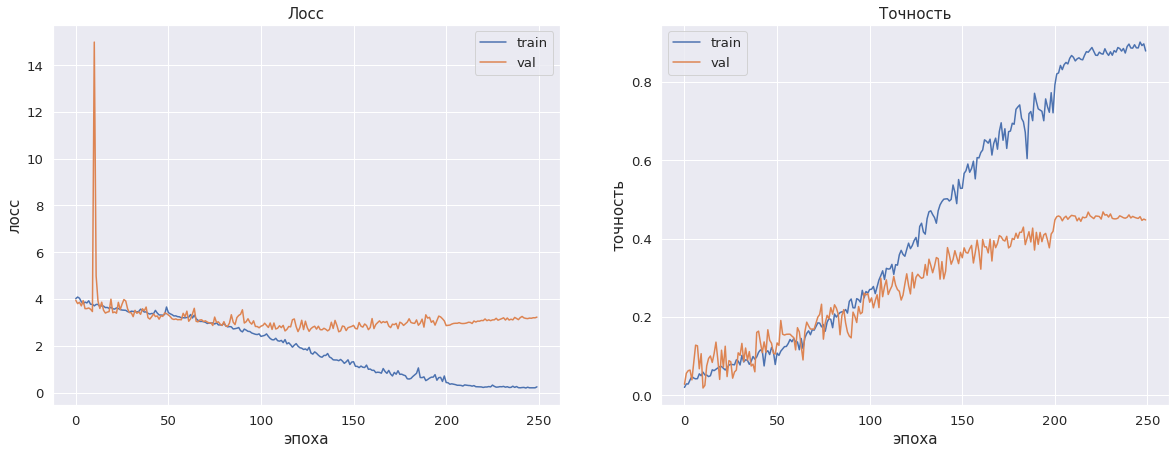

In [ ]:
plot_learning_curves(history)

In [ ]:
test_accuracy = 

In [ ]:
print("Итоговый результат:")
print("Test F1 score:\t\t{:.2f} %".format(test_f1_score * 100))

if test_f1_score * 100 >= 35:
    print("Достижение: 15 баллов из 15!")
elif test_f1_score * 100 >= 32.5:
    print("Достижение: 13 баллов из 15!")
elif test_f1_score * 100 >= 30:
    print("Достижение: 11 баллов из 15!")
elif test_f1_score * 100 >= 27.5:
    print("Достижение: 9 баллов из 15!")
elif test_f1_score * 100 >= 25:
    print("Достижение: 7 баллов из 15!")
elif test_f1_score * 100 >= 20:
    print("Достижение: 5 баллов из 15!")
elif test_f1_score * 100 >= 17:
    print("Достижение: 3 балла из 15!")
else:
    print("Попробуй еще.")

In [ ]:
print("Итоговый результат:")
print("  test accuracy:\t\t{:.2f} %".format(
    test_accuracy * 100))

if test_accuracy * 100 > 40:
    print("Achievement unlocked: Transformer!")
elif test_accuracy * 100 > 35:
    print("Achievement unlocked: LSTM!")
elif test_accuracy * 100 > 30:
    print("Achievement unlocked: RNN!")
elif test_accuracy * 100 > 25:
    print("Achievement unlocked: perceptron!")
else:
    print("We need more \"layers\"! Follow instructons below")

Итоговый результат:
  test accuracy:		46.42 %
Achievement unlocked: Transformer!


Обязательно заполните отчет. Опишите свои эксперименты: с чего вы начали, что попробовали улучшить и почему, заработало это или нет, какие вы сделали из этого выводы. Также обязательно опишите вашу лучшую архитектуру, методы обучения и интересные моменты.

**ResNet50**

Отчет: Была взята модель дефолтная ResNet50. Обучение производилось при помощи Adam. Первые 125 эпох использовался lr=1e-3. Затем 25 эпох lr=1e-4, а затем еще 5 эпох lr=1e-5. Использовался l2=1e-5.

Использовался первый способ обработки дизбаланса классов (корректировка лосса).

В истории первая эпоха была пропущена, потому что там был большой лосс на валидаци, что портило читаемость графиков.

После 2.5 часов обучения, я получил следующие результаты:

* accuracy on training: 39.29%
* accuracy on validation: 32.12%
* accuracy on test: 33.18%

**ResNet50(Mish)**

Отчет: В предыдущей модели была заменена функция активации с ReLU на Mish. Обучение производилось при помощи Adam. Первые 100 эпох использовался lr=1e-3. Затем 25 эпох lr=1e-4. Обучение как будто бы шло чуть быстрее, но результат улучшить не удалось.

Использовался первый способ обработки дизбаланса классов (корректировка лосса).

После 2.5 часов обучения, я получил следующие результаты:

* accuracy on training: 37.96%
* accuracy on validation: 30.76%
* accuracy on test: 31.26%

**ResNet50(Sampler)**

Отчет: Была взята модель из первого пункта, но была изменена процедура обработки дизбаланса классов (теперь брался random oversampling на уровне батча). Обучение производилось при помощи Adam. Первые 100 эпох использовался lr=1e-3. Затем 25 эпох lr=1e-4. Модель была более склонна к переобучению судя по графикам лосса.

После 2.5 часов обучения, я получил следующие результаты:

* accuracy on training: 50.72%
* accuracy on validation: 30%
* accuracy on test: 31.77%

**ResNet50(Radam)**

Отчет: Была взята модель из первого пункта. Обучение производилось при помощи RAdam. Первые 200 эпох использовался lr=1e-3. Затем 25 эпох lr=1e-4. В этот раз я до последнего ждал, пока точность продолжала повышаться, даже если лосс стагнировал или слегка увеличивался. В итоге удалось значительно улучшить показатели. Возможно, RAdam поспособствовал этому, но не факт.

После 5 часов обучения, я получил следующие результаты:

* accuracy on training: 87.91%
* accuracy on validation: 44.76%
* accuracy on test: 46.42%

**Ансамблирование на тесте**

Можно взять FiveCrop преобразование, для каждого кропа предсказать логиты, а потом сложить и из этого взять argmax. По идее, это будет некое подобие ансамбля по разным частям изображения. 

Эта идея пробовалась, но в несколько экспериментальном формате, когда размеры тестовых картинок уже уменьшены. Возможно, это могло бы лучше сработать, если бы для теста брались картинки побольше.

* accuracy on test: ~37%


**Эксперименты, которые еще можно было бы провести**

* Нормализация изображений
* Изменение размера изображений
* Другие параметры аугментаций и их бОльшее количество
* Изменение блока при помощи groups (получим некое подобие Inception-блока)
* Сделать больше слоев

## Часть 2: Transfer Learning

Попробуйте теперь использовать предобученную модель для классификации и сравните результаты.
Сделав эту часть задания вы сможете получить 5 баллов.


Вы можете пробовать любые предобученные архитектуры. Некоторые из них можно найти по ссылке [torchvision.models](https://pytorch.org/docs/stable/torchvision/models.html).

Загрузите веса модели:

In [ ]:
resnet_model = torchvision.models.wide_resnet50_2(pretrained=True)

Все предобученные модели можно разделить на две части:

* Cверточная часть, которая работает как feature extractor.

* Классификатор.

Скорее всего вам потребуется заменить предобученный классификатор, чтобы использовать модель для работы с новым датасетом. Наиболее популярные подходы при замене классификатора:

* Fully-connected слои.

* Global average pooling. Подробнее можно прочитать в [статье](https://arxiv.org/pdf/1312.4400.pdf).

* [Linear SVM](https://arxiv.org/pdf/1306.0239.pdf), если хочется чего-нибудь необычного.

#### Несколько советов:

* Так как входные данные разных моделей могут иметь разный размер, вам может потребоваться поменять исходный размер изображения. В этом могут помочь, например, `cv2.resize`, `skimage.resize` или `torch.transforms.Resize`.

* Для дообучения слоев с предобученными весами можно использовать меньший learning rate, чем для обучения слоев со случайной инициализацией. Так как в самом начале обучения градиенты от случайно инициализированного классификатора могут слишком сильно изменить хорошие предобученные веса.

#### Стратегии:

* Использовать предобученную нейросеть как feature extractor, убрав последний FC слой. Обучить новый классификатор на полученном признаковом описании.

* При обучении классификатора продолжить backpropagation на более глубокие слои нейросети ("разморозить" их). При этом возможно "разморозить" все слои или зафиксировать несколько начальных слоёв и не обучать их.

* Вы можете совместить стратегии: сначала обучить классификатор, а потом постепенно размораживать слои и обучать их с меньшим learning rate-ом.

Какую стратегию вы выбрали и почему?

**Вывод:** Было решено выбрать стратегию с использованием предобученной сети в качестве feature extractor. Этот подход простой и быстро обучается.

Заморозим все кроме последнего сверточного блока из множества слоев.

In [ ]:
# "замораживаем" все веса всех слоев
for i, param in enumerate(resnet_model.children()):
    param.requires_grad = False

in_features = resnet_model.fc.in_features
resnet_model.fc = nn.Identity()
set_seed_everywhere(random_seed, USE_GPU)

fine_tuning_model = nn.Sequential(OrderedDict([
    ('features', resnet_model),
    ('classifier', nn.Sequential(nn.ReLU(), 
                                 nn.Linear(in_features, 512), 
                                 nn.ReLU(), 
                                 nn.Linear(512, num_classes)))
]))

fine_tuning_model = fine_tuning_model.to(device=device)

Также следует нормализовать все изображения, так как претренированная модель ожидает нормализованный вход. Для простоты отнормализуем вход по ImageNet.

In [ ]:
image_size = (200, 200)

transform_train.transforms.append(
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
)

transform_valid.transforms.append(
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
)

data_dir = 'data/'

train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), 
                                     transform=transform_train)
val_dataset = datasets.ImageFolder(os.path.join(data_dir, 'val'), 
                                   transform=transform_valid)

In [ ]:
set_seed_everywhere(random_seed, USE_GPU)
criterion = nn.CrossEntropyLoss(
    weight=weight_classes.to(device=device)
)
weight_decay = 1e-5
optimizer = radam.RAdam([
            {'params': fine_tuning_model.features.parameters(), 'lr': 1e-4},
            {'params': fine_tuning_model.classifier.parameters(), 'lr': 1e-3},
            ], weight_decay=weight_decay)

batch_size = 64

train_batch_gen = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=2
)
val_batch_gen = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, num_workers=2,
)

In [ ]:
fine_tuning_model, history = train(
    fine_tuning_model, criterion, optimizer,
    train_batch_gen, val_batch_gen,
    num_epochs=10, history=history
)

In [ ]:
path_save = os.path.join(MODEL_PREFIX, 'finetune-resnet50-wide', 'epoch35.pt')
torch.save({
    'epoch': 35,
    'model_state_dict': fine_tuning_model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'history': dict(history),
    }, path_save)

Сравните результаты предобученной модели и результаты из первой части. Сделайте вывод.

In [ ]:
test_dataset = datasets.ImageFolder(os.path.join(data_dir, 'test'), 
                                   transform=transform_valid)

test_batch_gen = torch.utils.data.DataLoader(
    test_dataset, batch_size=64, shuffle=False, num_workers=4,
)

In [ ]:
path_load = os.path.join(MODEL_PREFIX, 'finetune-resnet50-wide', 'epoch35.pt')
all_answers, all_predictions, history = load_and_test(fine_tuning_model, 
                                                      path_load, 
                                                      test_batch_gen)
test_accuracy = accuracy_score(all_answers, all_predictions)

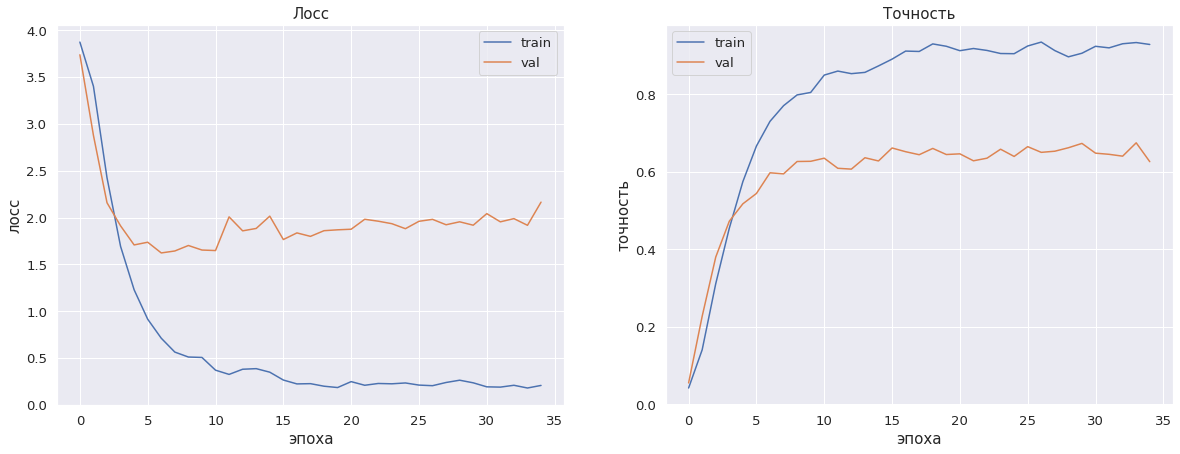

In [ ]:
plot_learning_curves(history)

In [ ]:
print("Итоговый результат:")
print("  test accuracy:\t\t{:.2f} %".format(
    test_accuracy * 100))

if test_accuracy * 100 > 40:
    print("Achievement unlocked: Transformer!")
elif test_accuracy * 100 > 35:
    print("Achievement unlocked: LSTM!")
elif test_accuracy * 100 > 30:
    print("Achievement unlocked: RNN!")
elif test_accuracy * 100 > 25:
    print("Achievement unlocked: perceptron!")
else:
    print("We need more \"layers\"! Follow instructons below")

Итоговый результат:
  test accuracy:		67.96 %
Achievement unlocked: Transformer!


**ResNet50Wide**

Отчет: Была взята модель ResNet50Wide, так как она имеет достаточно хорошее качество на ImageNet, согласно torchvision, и при этом состоит не из огромного числа слоев. Обучение производилось при помощи Adam. Первые 15 эпох использовался lr=1e-3. Затем 20 эпох lr=1e-4.

Использовался первый способ обработки дизбаланса классов.

После 40 минут обучения, я получил следующие результаты:

* accuracy on training: 92%
* accuracy on validation: 65%
* accuracy on test: 67.96%

Пробовал обучать также без нормализации, и качество было сравнимым. Также в зависимости от разбиения на трейн/валидацию качество несколько варьируется.

Как видим, этот подход даже без разморозки слоев модели нам удалось улучшить результат модели, обучающеся from scratch. Возможно, тренировка на ImageNet значительно лучше сказывается на качестве сети.

#### Часть 2: Критерий остановки для обучения нейросетей


Теперь проведем тест. Возьмем модель из transfer learning, обученную на 25 эпохах, и модель, обученную на 35 эпохах и посмотрим стоило ли продолжать обучение.

В данном случае мы имеем связанные бернуллиевские выборки (угадал/не угадал). Воспользумся критерием, изложенным в VII съезде.

In [ ]:
path_load = os.path.join(MODEL_PREFIX, 'finetune-resnet50-wide', 'epoch25.pt')
all_answers, all_predictions, history = load_and_test(fine_tuning_model, 
                                                      path_load, 
                                                      val_batch_gen)
is_correct_25 = (all_answers == all_predictions)

In [ ]:
path_load = os.path.join(MODEL_PREFIX, 'finetune-resnet50-wide', 'epoch35.pt')
all_answers, all_predictions, history = load_and_test(fine_tuning_model, 
                                                      path_load, 
                                                      val_batch_gen)
is_correct_35 = (all_answers == all_predictions)

Эта операция делается не по смыслу, а потому что нам там для расчетов требуются именно данные величины.

In [ ]:
(e, f), (g, h) = confusion_matrix(is_correct_25, is_correct_35)

In [ ]:
statistic = (f-g)/(np.sqrt(f + g - (f-g)**2 / all_answers.shape[0]))
p_value = sps.norm.sf(np.abs(statistic))

In [ ]:
p_value

0.0977291950561805

Гипотеза об однородности бернуллиевских выборок не отвергается на уровне значимости $0.05$. Это можно интерпретировать как то, что продолжать обучение с текущими настройками не имеет смысла.

Хочется также прокомментировать тот факт, что такой метод никак не учитывает, что точность на валидации постояннно колеблется. Также он может, возможно, не сможет уловить изменение, если слишком маленький learning rate.

Для борьбы с колебаниями можно попробовать считать некий сглаженный показатель за несколько предыдущих эпох.